In [1]:
from keras.layers import Convolution2D,MaxPooling2D,Flatten
from keras.layers import Dense
from keras.models import Sequential


Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:
classifier.add(Convolution2D(32,3,3,input_shape =(224,224,3),activation = 'relu' ))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [4]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
classifier.add(Flatten())

In [6]:
classifier.add(Dense(output_dim = 128,activation = 'relu'))
classifier.add(Dense(output_dim = 3,activation = 'softmax'))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  


In [7]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               50466944  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 50,468,227
Trainable params: 50,468,227
Non-trainable params: 0
_________________________________________________________________


In [8]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(rescale = 1./255,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True 
                                     )

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = training_datagen.flow_from_directory(
                                                    'dataset/train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode ='categorical'
                                                    )

Found 75 images belonging to 3 classes.


In [12]:
testing_set = test_datagen.flow_from_directory(
                                                'dataset/test',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode ='categorical'
                                               )

Found 30 images belonging to 3 classes.


In [13]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 75,
                         epochs=5,
                         validation_data=testing_set,
                         validation_steps=30
                        )

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=5, validation_data=<keras.pre..., validation_steps=30, steps_per_epoch=2)`
  """



Epoch 1/5
2/2 [==============================] - 58s 29s/step - loss: 28.4921 - accuracy: 0.5814 - val_loss: 3.4037e-05 - val_accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 62s 31s/step - loss: 9.2346 - accuracy: 0.8125 - val_loss: 10.0340 - val_accuracy: 0.9333
Epoch 3/5
2/2 [==============================] - 47s 24s/step - loss: 3.8283 - accuracy: 0.8605 - val_loss: 7.8845 - val_accuracy: 0.9000
Epoch 4/5
2/2 [==============================] - 50s 25s/step - loss: 2.3428 - accuracy: 0.9219 - val_loss: 3.7986e-06 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 52s 26s/step - loss: 1.3469 - accuracy: 0.9302 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


# For testing single image

In [14]:
import numpy as np
from keras.preprocessing import image

In [15]:
test_image =image.load_img('dataset/single/2.jpg',target_size =(224,224)) 

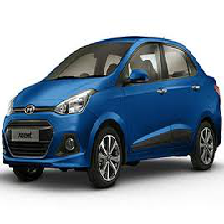

In [16]:
test_image

In [17]:
test_image = image.img_to_array(test_image)

In [18]:
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
result

array([[1., 0., 0.]], dtype=float32)

In [19]:
def classification(result):
    if result[0][0] == 1:
        cmd = 'Blue'
    elif result[0][1] ==1:
        cmd = 'Green'
    else:
        cmd = 'Red'
    print(cmd)        

In [20]:
training_set.class_indices

{'Blue': 0, 'Green': 1, 'Red': 2}

In [21]:
classification(result)

Blue
